# Corso di Probabilità e Statistica- Le proprietà statistiche dell'effetto Barkhausen

L'effetto Barkhausen è il rumore emesso da un ferromagnete durante il ciclo di isteresi. Le sue proprietà rivelano la complessità del moto delle pareti ferromagnetiche. In questo capitolo esploreremo le proprietà statistiche del rumore Barkhausen. 

I dati sperimentali sono dei segnali misurati su dei campioni di una lega policristallina FeSi da Gianfranco Durin (INRIM). Il voltaggio misurato è una misura della derivata della magnetizzazione $v=dB/dt$ 
in funzione del tempo. Gli esperimenti sono stati condotti a diverse frequenze $c= dH/dt$. Lo scopo di questo studio è di stabilire come la distribuzione del rumore dipenda dalla frequenza



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats 
import scipy
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
# Leggiamo i file
FS0005=scipy.genfromtxt("../data/Barkhausen/FS78G_0.005_time_1.dat")
FS001=scipy.genfromtxt("../data/Barkhausen/FS78G_0.01_time_1.dat")
FS002=scipy.genfromtxt("../data/Barkhausen/FS78G_0.02_time_1.dat")
FS003=scipy.genfromtxt("../data/Barkhausen/FS78G_0.03_time_1.dat")
FS005=scipy.genfromtxt("../data/Barkhausen/FS78G_0.05_time_1.dat")

/tmp/ipykernel_13616/1736832712.py:2: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS0005=scipy.genfromtxt("../data/Barkhausen/FS78G_0.005_time_1.dat")
/tmp/ipykernel_13616/1736832712.py:3: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS001=scipy.genfromtxt("../data/Barkhausen/FS78G_0.01_time_1.dat")
/tmp/ipykernel_13616/1736832712.py:4: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS002=scipy.genfromtxt("../data/Barkhausen/FS78G_0.02_time_1.dat")
/tmp/ipykernel_13616/1736832712.py:5: DeprecationWarning: scipy.genfromtxt is deprecated and will be removed in SciPy 2.0.0, use numpy.genfromtxt instead
  FS003=scipy.genfromtxt("../data/Barkhausen/FS78G_0.03_time_1.dat")
/tmp/ipykernel_13616/1736832712.py:6: DeprecationWarning: scipy.genfromtxt is deprecated and will be remov

In [5]:
print(FS0005)
print(FS001)
print(len(FS0005))
print(len(FS001))

[-4.21923828e-09  5.78076172e-09 -2.02192383e-08 ...  6.77807617e-08
  5.17807617e-08  8.77807617e-08]
[5.88212891e-07 7.56212891e-07 5.04212891e-07 ... 1.64212891e-07
 1.92212891e-07 1.20212891e-07]
65536
65536


Sono file creati nello stesso modo ma che tra di loro differiscono semplicemente per la frequenza di variazione del campo magnetico che sto valutando.

In [7]:
# inseriamo i files in un unico dataframe
df=pd.DataFrame(data=FS0005,columns=["Voltage"])
df["Frequency"]=0.005
df['time'] = range(1, len(df) + 1)

df1=pd.DataFrame(data=FS001,columns=["Voltage"])
df1["Frequency"]=0.01
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)

df1=pd.DataFrame(data=FS002,columns=["Voltage"])
df1["Frequency"]=0.02
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)

df1=pd.DataFrame(data=FS003,columns=["Voltage"])
df1["Frequency"]=0.03
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)

df1=pd.DataFrame(data=FS005,columns=["Voltage"])
df1["Frequency"]=0.05
df1['time'] = range(1, len(df1) + 1)
df=df.append(df1)

Nella cella precedente quello che faccio è semplicemente aggiuingere di volta in volta una nuva sezione del dataframe che posso unire facendo semplicemente "append" come per altre liste.

In [8]:
df

,Voltage,Frequency,time
0,-4.219238e-09,0.005,1
1,5.780762e-09,0.005,2
2,-2.021924e-08,0.005,3
3,-1.821924e-08,0.005,4
4,5.778076e-08,0.005,5
...,...,...,...
16379,1.552041e-07,0.050,16380
16380,1.552041e-07,0.050,16381
16381,9.120410e-08,0.050,16382
16382,7.520410e-08,0.050,16383


**Esplorazione qualitativa** Per prima cosa facciamo dei grafici dei segnali Barkhausen, calcoliamone le medie e guardiamone la distribuzione

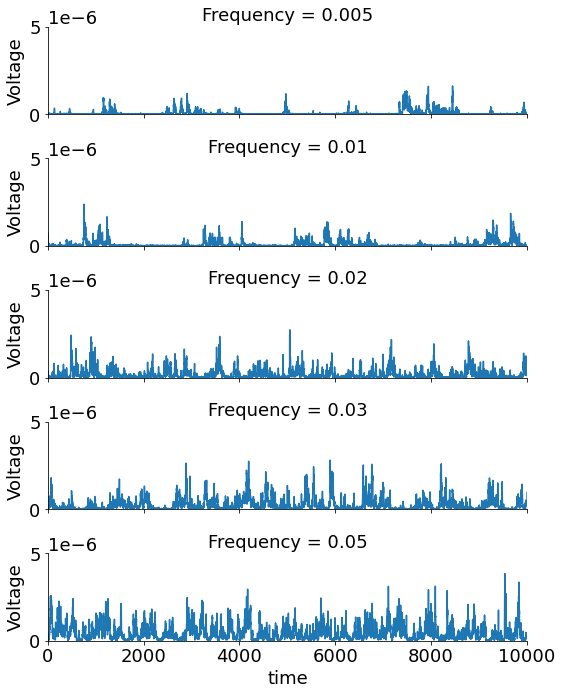

In [9]:
plt.rcParams.update({'font.size': 18})
# plottiamo i segnali
g = sns.FacetGrid(df, row="Frequency", height=2, aspect=4.) 
#il dataset è df, distinguo le righe sulla base della frequenza
g.map_dataframe(sns.lineplot, x="time", y="Voltage")
plt.ylim((0,5e-6))
plt.xlim((0,10000))
g.set_axis_labels("time", "Voltage")

In [19]:
#confrontiamo le proprietà dei segnali
media=df.groupby("Frequency").mean()
media.reset_index(inplace=True) #mi aggiunge una colonna che resetta gli indici
media

,Frequency,Voltage,time,log(Voltage)
0,0.005,1.023657e-07,32927.083804,-17.244832
1,0.010,1.078288e-07,32644.430946,-17.343431
2,0.020,1.719944e-07,8179.603956,-16.407820
3,0.030,2.432015e-07,16237.523981,-16.087013
4,0.050,4.176128e-07,8168.423947,-15.255901


Faccio scatterplot del voltaggio in funzione della frequenza utilizzando come dataset la media

(1e-08, 5e-07)

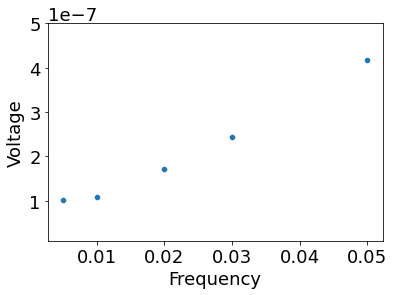

In [20]:
sns.scatterplot(data=media, x="Frequency", y="Voltage")
plt.ylim((1e-08,5e-07))

Proviamo a confrontare le distribuzioni con un boxplot

(0.0, 1e-06)

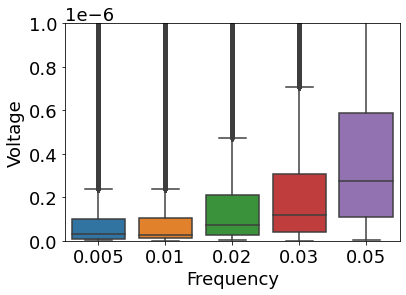

In [21]:
sns.boxplot(data=df, x="Frequency", y="Voltage")
plt.ylim((0,1e-06))

Notiamo che ci sono molti "outliers" ovvero le distribuzioni hanno delle code molto lunghe. Conviene quindi considerare il logaritmo del segnale

/tmp/ipykernel_13616/879996576.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log(Voltage)"]=np.log(df.Voltage)


<AxesSubplot:xlabel='Frequency', ylabel='log(Voltage)'>

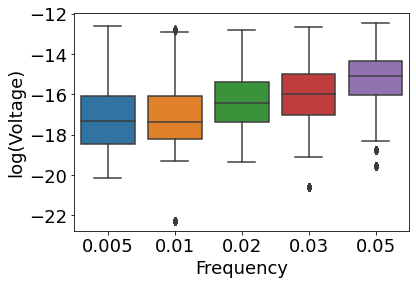

In [22]:
df["log(Voltage)"]=np.log(df.Voltage)
# togliamo i NaN
df=df.dropna()
sns.boxplot(data=df, x="Frequency", y="log(Voltage)")

In [31]:
df

,Voltage,Frequency,time,log(Voltage)
1,5.780762e-09,0.005,2,-18.968730
4,5.778076e-08,0.005,5,-16.666610
5,4.578076e-08,0.005,6,-16.899402
11,1.780762e-09,0.005,12,-20.146225
14,1.778076e-08,0.005,15,-17.845149
...,...,...,...,...
16379,1.552041e-07,0.050,16380,-15.678525
16380,1.552041e-07,0.050,16381,-15.678525
16381,9.120410e-08,0.050,16382,-16.210166
16382,7.520410e-08,0.050,16383,-16.403060


Consideriamo ora gli istogrammi

In [39]:
df= df.loc[~df.index.duplicated(), :]

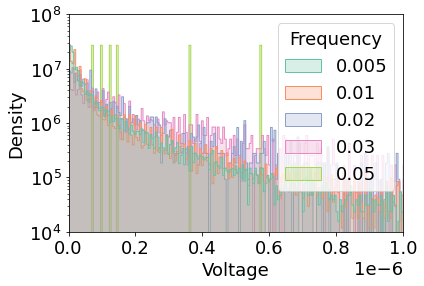

In [43]:
#log-lin
g=sns.histplot(data=df, x="Voltage", hue="Frequency", 
             stat="density", kde=False, palette="Set2",
             cumulative=False,  
             common_norm=False, element="step")
g.set_yscale('log')
plt.xlim((0,1e-6))
plt.ylim((1e4,1e8))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

(0.001, 1)

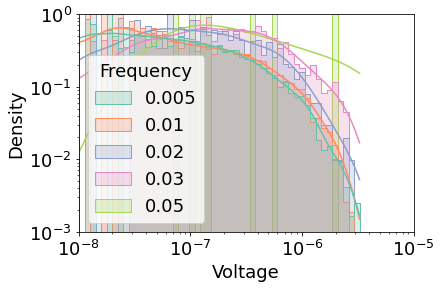

In [44]:
#log-log
g=sns.histplot(data=df,x="Voltage",hue="Frequency", 
             stat="density", kde=True, palette="Set2",
             cumulative=False, log_scale=True, 
               common_norm=False, element="step")
g.set_yscale('log')
plt.xlim((1e-8,1e-5))
plt.ylim((1e-3,1))

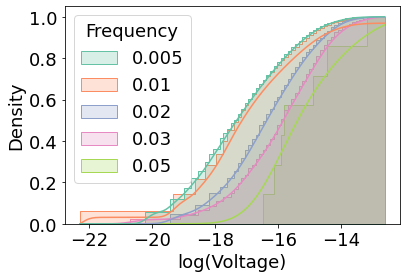

In [45]:
# cumulate
g=sns.histplot(data=df,x="log(Voltage)",hue="Frequency", 
             stat="density", palette="Set2",
             cumulative=True, common_norm=False, 
             element="step" , kde=True)

### Modello

Il modello ABBM (Alessandro, Beatrice, Bertotti, Montorsi) descrive il moto di una parete ferromagnetica con il moto in un potenziale random:

$$ \frac{dx}{dt} = Ct - kx + W(x)$$

dove $ct$ è proporzionale al campo magnetico, $-kx$ al campo smagnetizzante, $W(x)$ è un random walk in $x$ e rappresenta il potenziale random con correlazioni

$$ \langle (W(x)-W(x'))^2 \rangle = D|x-x'|$$

La soluzione di questo modello prevede che la distribuzione delle velocità della parete (proporzionale al voltaggio misurato sperimentalmente) segue una distribuzione gamma:

$$ p(v) = \frac{v^{c-1} e^{-v/v_0}}{\Gamma(c)} $$

con $c=C/D$ e $v_0=D/k$


Usiamo il metodo MLE per fittare il segnale sperimentale con la teoria:

In [46]:
c, loc, v_0= scipy.stats.gamma.fit(df[df["Frequency"]==0.05].Voltage, floc=0, scale=1e-7)

In [47]:
c,v_0

(0.8752231663423394, 5.468692916245991e-07)

Confrontiamo il fit con l'istogramma sperimentale

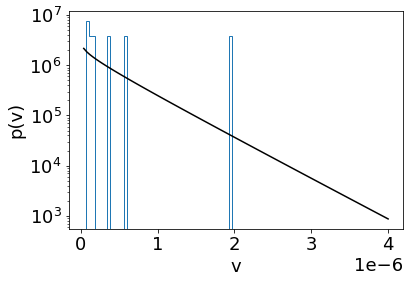

In [50]:
xmin=0
xmax=4e-6
x = np.linspace(xmin,xmax,101)
plt.hist(df[df["Frequency"]==0.05].Voltage,bins=50, density=True, label='data',
         stacked=True, log=True, histtype="step")
gg=scipy.stats.gamma(c,loc=0, scale=v_0)
plt.plot(x, gg.pdf(x), label="Fit 1", color="black")
plt.xlabel('v')
plt.ylabel('p(v)')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

**Esercizio**

- Fittare le distribuzioni per tutte le 5 frequenze.  
- Rappresentare tutti i fit in un unica figura
- Calcolare dal fit la media della distribuzione gamma $\langle v \rangle= c v_0$ e poi plottarla in funzione della media di ciascuna distribuzione sperimentale.
- Plottare $c$ e $v_0$ in funzione della frequenza.
